In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing,

## Model for Perceptron


We looked at the implementation of the perceptron algorithm in our lecture. We learned about two main types of perceptron
* Batch perceptron
* Stochastic perceptron


In the below notebook, we will implement both batch and stochastic perceptron algorithms.

Steps on how to proceed: 

* Complete the code in class `Perceptron` using `Batch Perceptron`. check the results, note the accuracy and mention it in the last cell under "Batch Perceptron Accuracy"" 
* Complete the code in class `Perceptron` using `Stochastic Perceptron`. check the results, note the accuracy and mention it in the last cell under "Stochastic Perceptron Accuracy""

In [28]:
class Perceptron:
    """
    Perceptron neuron
    """

    def __init__(self, learning_rate=0.1, batch=10):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []
        self.batch = batch

    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        
        self._b = 0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            
            ####### YOUR CODE HERE #######
            ### BATCH DESCENT ###
            errors = 0
            for i in range(0, x.shape[0], self.batch):
                x_batch = x[i:i+self.batch]
                y_batch = y[i:i+self.batch]
                
                lr = self.learning_rate
                of = np.sum(y_batch) - np.sum((self.predict(x_batch)).reshape(y_batch.shape))
                update_val = lr * of
                self._w += np.sum(update_val * x_batch, axis=0)
                self._b = self._b + update_val
                if np.sum(of) != 0:
                    errors += 1
                else:
                    errors += 0
            self.misclassified_samples.append(errors)
            

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        print(np.where(self.f(x) >= 0, 1, -1))
        return np.where(self.f(x) >= 0, 1, -1)

In [29]:
import pandas as pd
###### YOUR CODE HERE ######

df = pd.read_csv('iris.data.csv', header=None)

###### YOUR CODE ENDS HERE ######

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


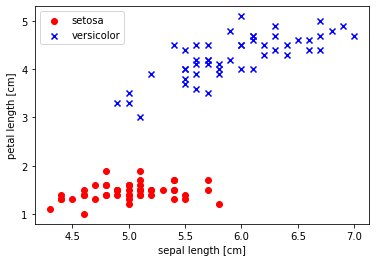

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
###### YOUR CODE HERE ######
####select Iris-setosa using np.where. Make sure you take extra care of the indexing####
y = np.where(df.iloc[:, 4] == 'Iris-setosa', 1, -1)
###### YOUR CODE ENDS HERE ######   


###### YOUR CODE HERE ######
# extract sepal length and petal length
X = df.iloc[:, [0, 2]].values
###### YOUR CODE ENDS HERE ######

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[-1 -1 -1 -1 -1 -1 -

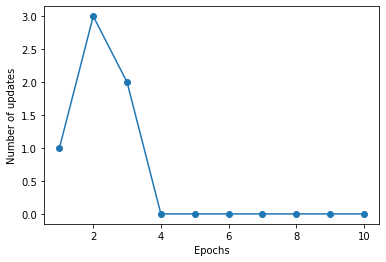

In [31]:
classifier = Perceptron(learning_rate=0.01, batch=10)

classifier.fit(X, y)
plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [32]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape[0])
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [33]:
plot_decision_regions(X, y, classifier=classifier)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

[ 1  1  1 ... -1 -1 -1]


ValueError: cannot reshape array of size 110600 into shape (395,)

### Bonus: Implement the changes of decision boundary at each iteration
modify your fit method to demonstrate how the decision boundary changes at each iteration.

In [93]:
####Note that Perceptron class has "n_features" attribute which is the number of features in the dataset.

classifier = Perceptron(learning_rate=0.001, n_features=2)
for i in range(0, 10):
    classifier.fit(X, y)
    plot_decision_regions(X, y, classifier=classifier)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_features'

Batch Perceptron Accuracy:

Stocastic Perceptron Accuracy: 